In [1]:
import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


/home/hp/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Load time-lapse data...

In [2]:
# filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
# filename = '/Users/jug/Dropbox/ProjectGoldstein/4MyosinMembraneWholeEmbryo.tif'
#filename = '/Users/jug/Repositories/GIT/BobSeg/debug_data/MAX_LP320-06-08_Concat-1-50.tif'
filename = '/home/hp/git/BobSeg/data/MAX_LP320-06-08_Concat-51-100.tif'


stack = imread(filename)
print 'Stack shape:',stack.shape

segchannel = stack[:,1,:,:]
flowchannel = stack[:,0,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)

print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

Stack shape: (50, 2, 595, 403)
Segchannel shape: (50, 595, 403)
Single image: (595, 403)


In [3]:
max_rs = (segchannel[0].shape[1] / 4,
          segchannel[0].shape[1] / 4)

min_rs = (25,25)
print min_rs, max_rs

(25, 25) (100, 100)


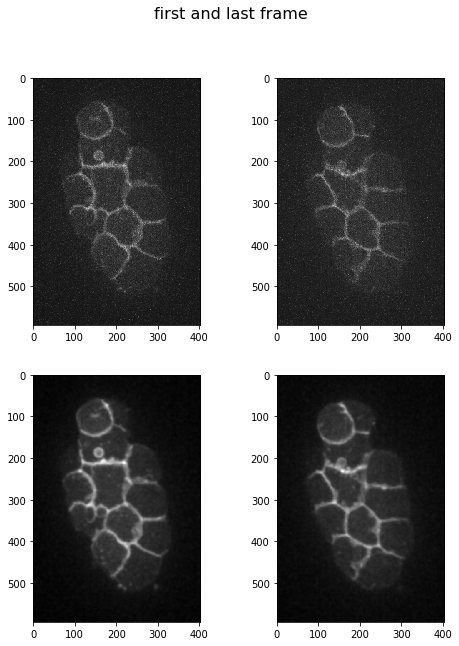

In [4]:
pylab.rcParams['figure.figsize'] = (8, 10)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(segchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(segchannel[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(segchannel_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(segchannel_smooth[-1], plt.get_cmap('gray'))

# Segmenting a cell

First we create a 'data' object.
We give 3 parameters:
- the channel (images) we want to use for segmenting the cell
- the pixel size in x and y direction (in case the resolution is not isotropic)
- silent: _true_ would mean that no outputs will be printed during segmentation

Then we initialize an _objects_ list (one could add multiple cells to one data object.

In [5]:
data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=100,max_delta_k=4)
objects = []

### Adding the cell to the _data_ object

You can name your cell if you wish. We then add the created _cell_ object to the _objects_ list we created above.

In [6]:
cell = data.init_object("cell 1")
objects.append(cell)
#cell_2 = data.init_object("cell 2")
#objects.append(cell_2)

So far we did not say where this cell is located in the image. Hence, we add the object at a specific location, here at frame zero, at location (seed point) x=170, y=250. With _segment_it=True_ the object will be segmented right away.

The second line takes the object, the cell, we just seeded at frame 0 and tracks it on all given _target_frames_. We just give a list of all frame ids from 1 to the number of images. The parameter _recenter_iterations_ should usually be at least 1. This is the number of times the segmentation tries to update the given seed point. Values >1 will take more time but might enhance the accuracy of tracking the object.

Added appearance for "cell 1" in frame 0 with seed coordinates [ 170.  250.]
      Optimum energy:  0.0159152658011
      Nodes in/out:  2661 4539
      Area:  8766.0
Added appearance for "cell 1" in frame 1 with seed coordinates [ 170.  250.]
      Optimum energy:  0.0160966570442
      Nodes in/out:  2592 4608
      Area:  8543.5
    Updated center to [175 253]
Added appearance for "cell 1" in frame 2 with seed coordinates [ 175.  253.]
      Optimum energy:  0.0144033192572
      Nodes in/out:  2529 4671
      Area:  8154.0
    Updated center to [178 256]
Added appearance for "cell 1" in frame 3 with seed coordinates [ 178.  256.]
      Optimum energy:  0.0142215604639
      Nodes in/out:  2460 4740
      Area:  7832.5
    Updated center to [180 257]
Added appearance for "cell 1" in frame 4 with seed coordinates [ 180.  257.]
      Optimum energy:  0.0137280384247
      Nodes in/out:  2457 4743
      Area:  7793.5
    Updated center to [181 258]
Added appearance for "cell 1" in fram

      Optimum energy:  0.00925736462058
      Nodes in/out:  2235 4965
      Area:  7072.5
    Updated center to [165 267]
Added appearance for "cell 1" in frame 42 with seed coordinates [ 165.  267.]
      Optimum energy:  0.0105690637273
      Nodes in/out:  2258 4942
      Area:  7158.5
    Updated center to [165 268]
Added appearance for "cell 1" in frame 43 with seed coordinates [ 165.  268.]
      Optimum energy:  0.0107352800222
      Nodes in/out:  2209 4991
      Area:  6977.5
    Updated center to [166 269]
Added appearance for "cell 1" in frame 44 with seed coordinates [ 166.  269.]
      Optimum energy:  0.010632617655
      Nodes in/out:  2188 5012
      Area:  6901.0
    Updated center to [166 270]
Added appearance for "cell 1" in frame 45 with seed coordinates [ 166.  270.]
      Optimum energy:  0.0111091902693
      Nodes in/out:  2178 5022
      Area:  6872.5
    Updated center to [167 270]
Added appearance for "cell 1" in frame 46 with seed coordinates [ 167.  270.]


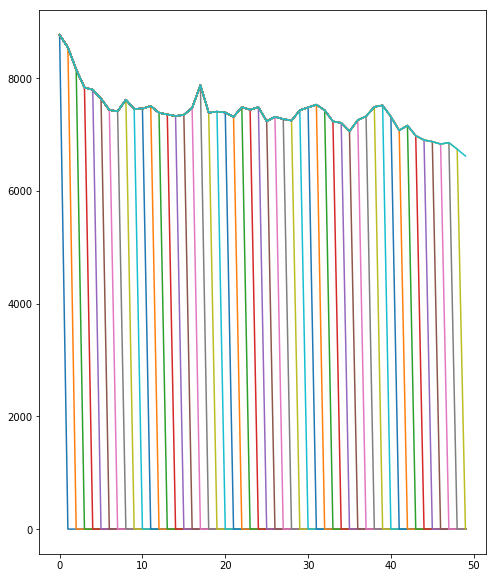

In [7]:
data.add_object_at( cell, min_rs, max_rs, frame=0, seed=(170,250), segment_it=True )
data.track(cell, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

The next command is optional. Without it you will have a segmented cell at every time point you indicated above. **The visualization routine in the next Section will allow you to compare the results of the above and the below segmentation.**

So why another optional line? If you are interested in having a smoothly changing cell outline over time, the line below will do just that. Technically this is achieved by constraining the segmentation to only be allowed to change a certain amount from one time point to the next. (Note: the found solution is still globally optimal given the constraints we put in!)

Results for frame 0:
      Optimum energy:  0.574356987751
      Area:  7975.0
Results for frame 1:
      Optimum energy:  0.574356987751
      Area:  8010.0
Results for frame 2:
      Optimum energy:  0.574356987751
      Area:  8025.5
Results for frame 3:
      Optimum energy:  0.574356987751
      Area:  8004.0
Results for frame 4:
      Optimum energy:  0.574356987751
      Area:  7915.0
Results for frame 5:
      Optimum energy:  0.574356987751
      Area:  7717.0
Results for frame 6:
      Optimum energy:  0.574356987751
      Area:  7618.5
Results for frame 7:
      Optimum energy:  0.574356987751
      Area:  7521.5
Results for frame 8:
      Optimum energy:  0.574356987751
      Area:  7493.0
Results for frame 9:
      Optimum energy:  0.574356987751
      Area:  7452.0
Results for frame 10:
      Optimum energy:  0.574356987751
      Area:  7403.0
Results for frame 11:
      Optimum energy:  0.574356987751
      Area:  7497.5
Results for frame 12:
      Optimum energy:  0.574

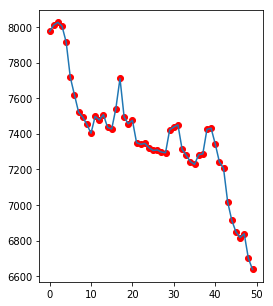

In [10]:
data.segment2dt( cell, max_radial_delta=2 )
#data.segment2dt( cell_2, max_radial_delta=2 )

# Visualizing the results

The following line creates images that show the outline of the segmented object(s).
**Below we will export these images (they will e.g. be needed for the KymographMaker).**

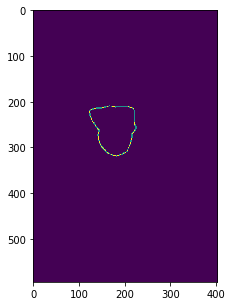

In [11]:
pylab.rcParams['figure.figsize'] = (4, 5)
segimgs = data.create_segmentation_image()
imshow(segimgs[0])

This is just for you visual pleasure (and of course to show if everyting worked ok).

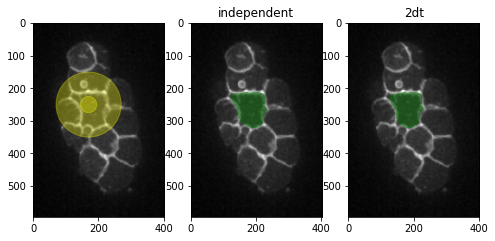

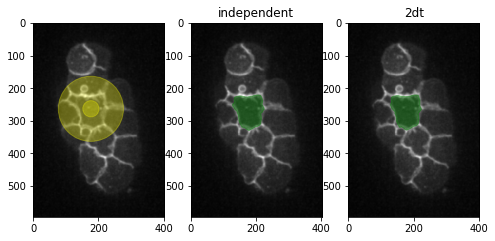

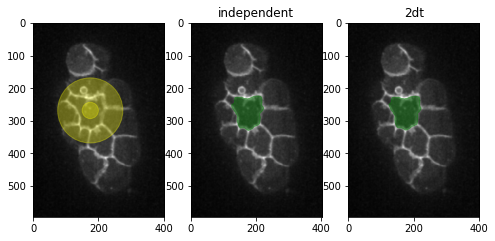

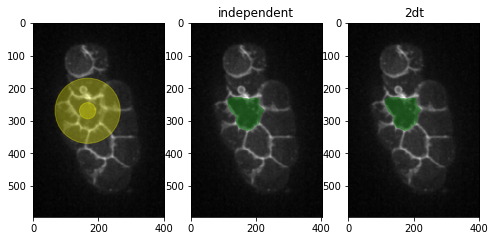

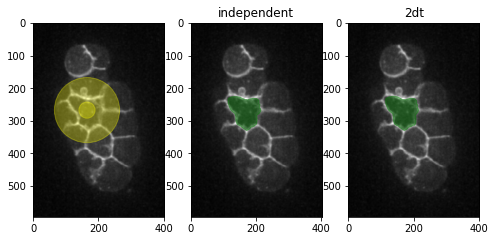

In [12]:
pylab.rcParams['figure.figsize'] = (8, 10)
for frame in range(1,len(data.images),len(data.images)/5):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )    
    ax = plt.subplot(133)
    ax.set_title('2dt')
    data.plot_2dt_result( frame, ax )

# FLOW

### Look at the loaded flow channel images...

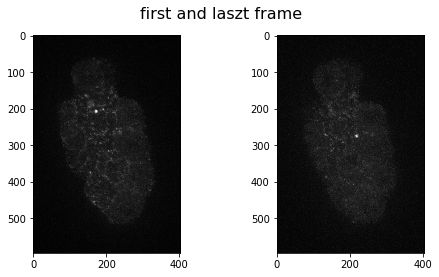

In [13]:
pylab.rcParams['figure.figsize'] = (8, 4)
fig = plt.figure()
fig.suptitle('first and laszt frame', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(flowchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flowchannel[-1], plt.get_cmap('gray'))

Flow computation is also part of the _data_ object we created above. Internally this uses a dense flow procedure implemented in OpenCV. The second cell then renders the image based on the computed flows.

Parameters are:
- the data2d object holding all computation results (including the computed flows)
- the images you want the flow to be computed on
- any second channel that will be used only for the visualization
- a folder into which the visualization frames will be stored
- _inline_: if _False_, a OpenCV window will pop open, otherwise visualizaiton will appear within jupyter (attention: much slower)

In [14]:
data.compute_flow( flowchannel );

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  ...done!


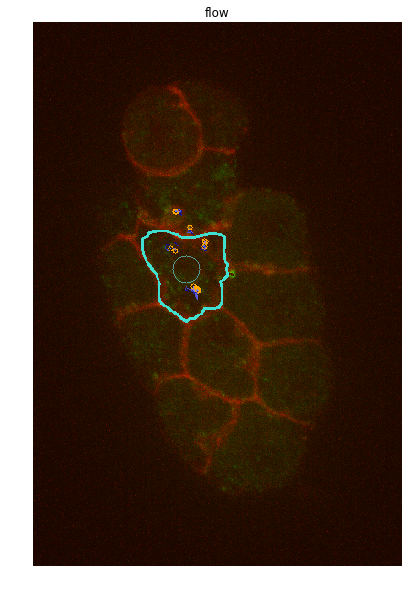

In [17]:
from moviemaker2d import MovieMaker2d
#import pdb; pdb.set_trace()
mm = MovieMaker2d( False )
mm.render_flow_movie( data, 
                      segchannel, 
                      flowchannel,
                      #folder='/Users/jug/Repositories/GIT/BobSeg/frames3d_tempconsistent_newFeatureTest/'
                     folder= '/home/hp/git/BobSeg/export/z_51-100_2/' , 
                      inline=True )

from moviemaker2d import MovieMaker2d
#import pdb; pdb.set_trace()
mm = MovieMaker2d( False )
mm.render_flow_movie( data, 
                      segchannel, 
                      flowchannel,
                      #folder='/Users/jug/Repositories/GIT/BobSeg/frames3d_tempconsistent_newFeatureTest/'
                     folder= '/home/hp/git/BobSeg/export/z_1-50_2/' , 
                      inline=True )

## Export Data (e.g. for KymographMaker)

In [14]:
#folder = '/Users/jug/Repositories/GIT/BobSeg/export/'
folder = '/home/hp/git/BobSeg/export/z_1-50/'

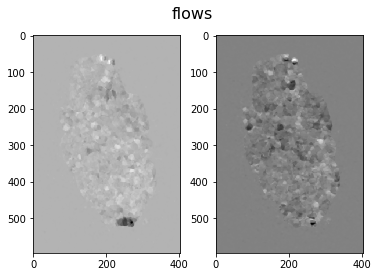

In [15]:
pylab.rcParams['figure.figsize'] = (6, 4)
fig = plt.figure()
fig.suptitle('flows', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(np.array(data.flows[1])[:,:,0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(np.array(data.flows[1])[:,:,1], plt.get_cmap('gray'))

In [16]:
imsave(folder+'flow01.tiff', np.swapaxes(np.swapaxes(data.flows,1,3),2,3))
imsave(folder+'stack01.tiff', stack)
imsave(folder+'seg01.tiff', segimgs)

In [4]:
help(imsave)

Help on function imsave in module tifffile.tifffile:

imsave(file, data, **kwargs)
    Write image data to TIFF file.
    
    Refer to the TiffWriter class and member functions for documentation.
    
    Parameters
    ----------
    file : str or binary stream
        File name or writable binary stream, such as a open file or BytesIO.
    data : array_like
        Input image. The last dimensions are assumed to be image depth,
        height, width, and samples.
    kwargs : dict
        Parameters 'append', 'byteorder', 'bigtiff', 'software', and 'imagej',
        are passed to the TiffWriter class.
        Parameters 'photometric', 'planarconfig', 'resolution', 'compress',
        'colormap', 'tile', 'description', 'datetime', 'metadata', 'contiguous'
        and 'extratags' are passed to the TiffWriter.save function.
    
    Examples
    --------
    >>> data = numpy.random.rand(2, 5, 3, 301, 219)
    >>> imsave('temp.tif', data, compress=6, metadata={'axes': 'TZCYX'})



In [8]:
stack.dtype

dtype('uint16')